### Coin flipping problem
We toss coin a number of times and record how many times head appears. Based on this we try to infer the fairness(biasness) of the coin we have. 

We will be needing a probabilistic model and data. 

### General model
$$ p(\theta | y ) \propto p(y | \theta) p(\theta) $$

Based on above we need to specify which prior $p(\theta)$ and likelihood $p(y | \theta)$
Lets assume the trails are independent, in that case we can have likelihhod as 
$$ p(y | \theta) = \frac{N!}{N!(N-y)!} \theta^y(1-\theta)^{(N-y)} $$

In [3]:
## Generating data with binomial distribution
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

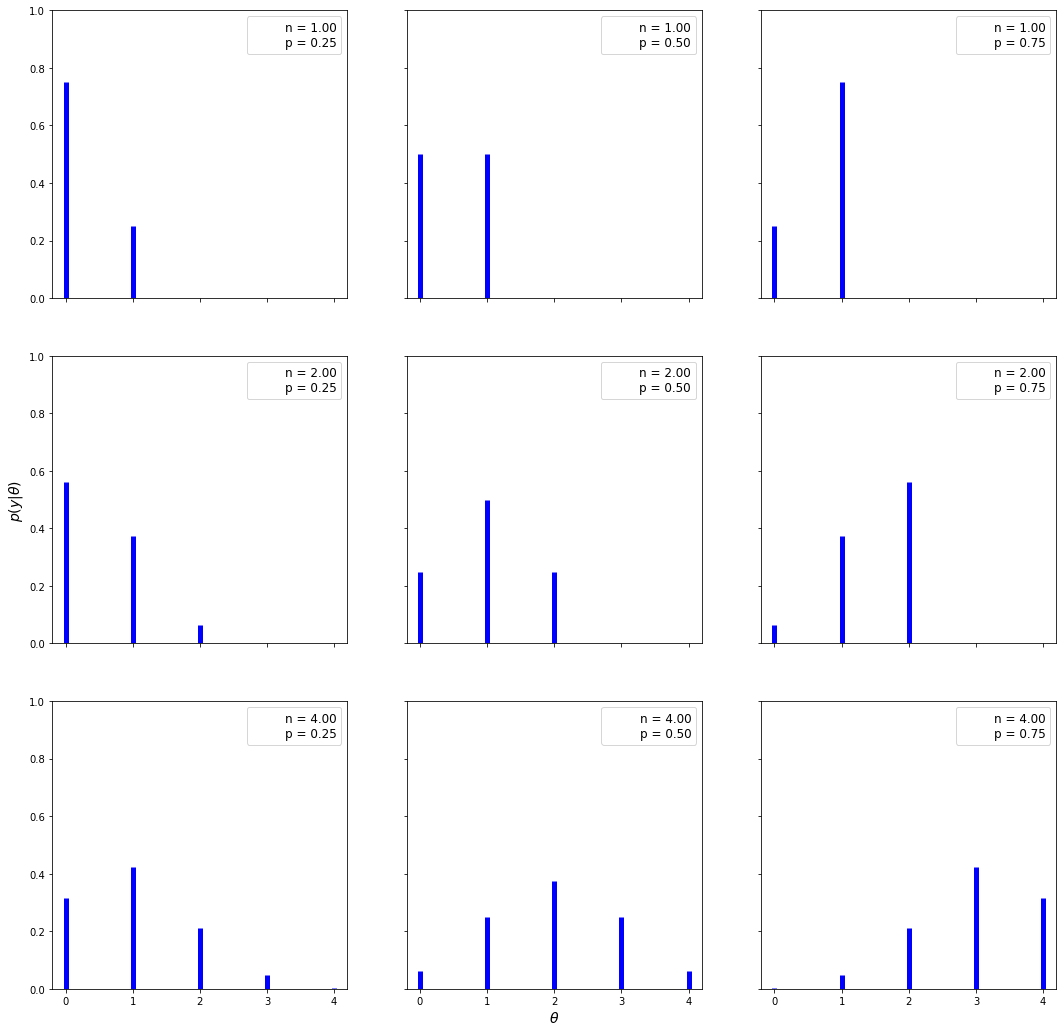

In [4]:
n_params = [1,2,4]
p_params = [0.25, 0.5, 0.75]

x = np.arange(0, max(n_params)+1)

f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True, figsize=(18,18))

for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='b', lw=5)
        ax[i,j].set_ylim(0,1)
        ax[i,j].plot(0,0, label="n = {:3.2f}\np = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend(fontsize=12)
    
    ax[2,1].set_xlabel('$\\theta$', fontsize=14)
    ax[1,0].set_ylabel('$p(y|\\theta)$', fontsize=14)
    ax[0,0].set_xticks(x)

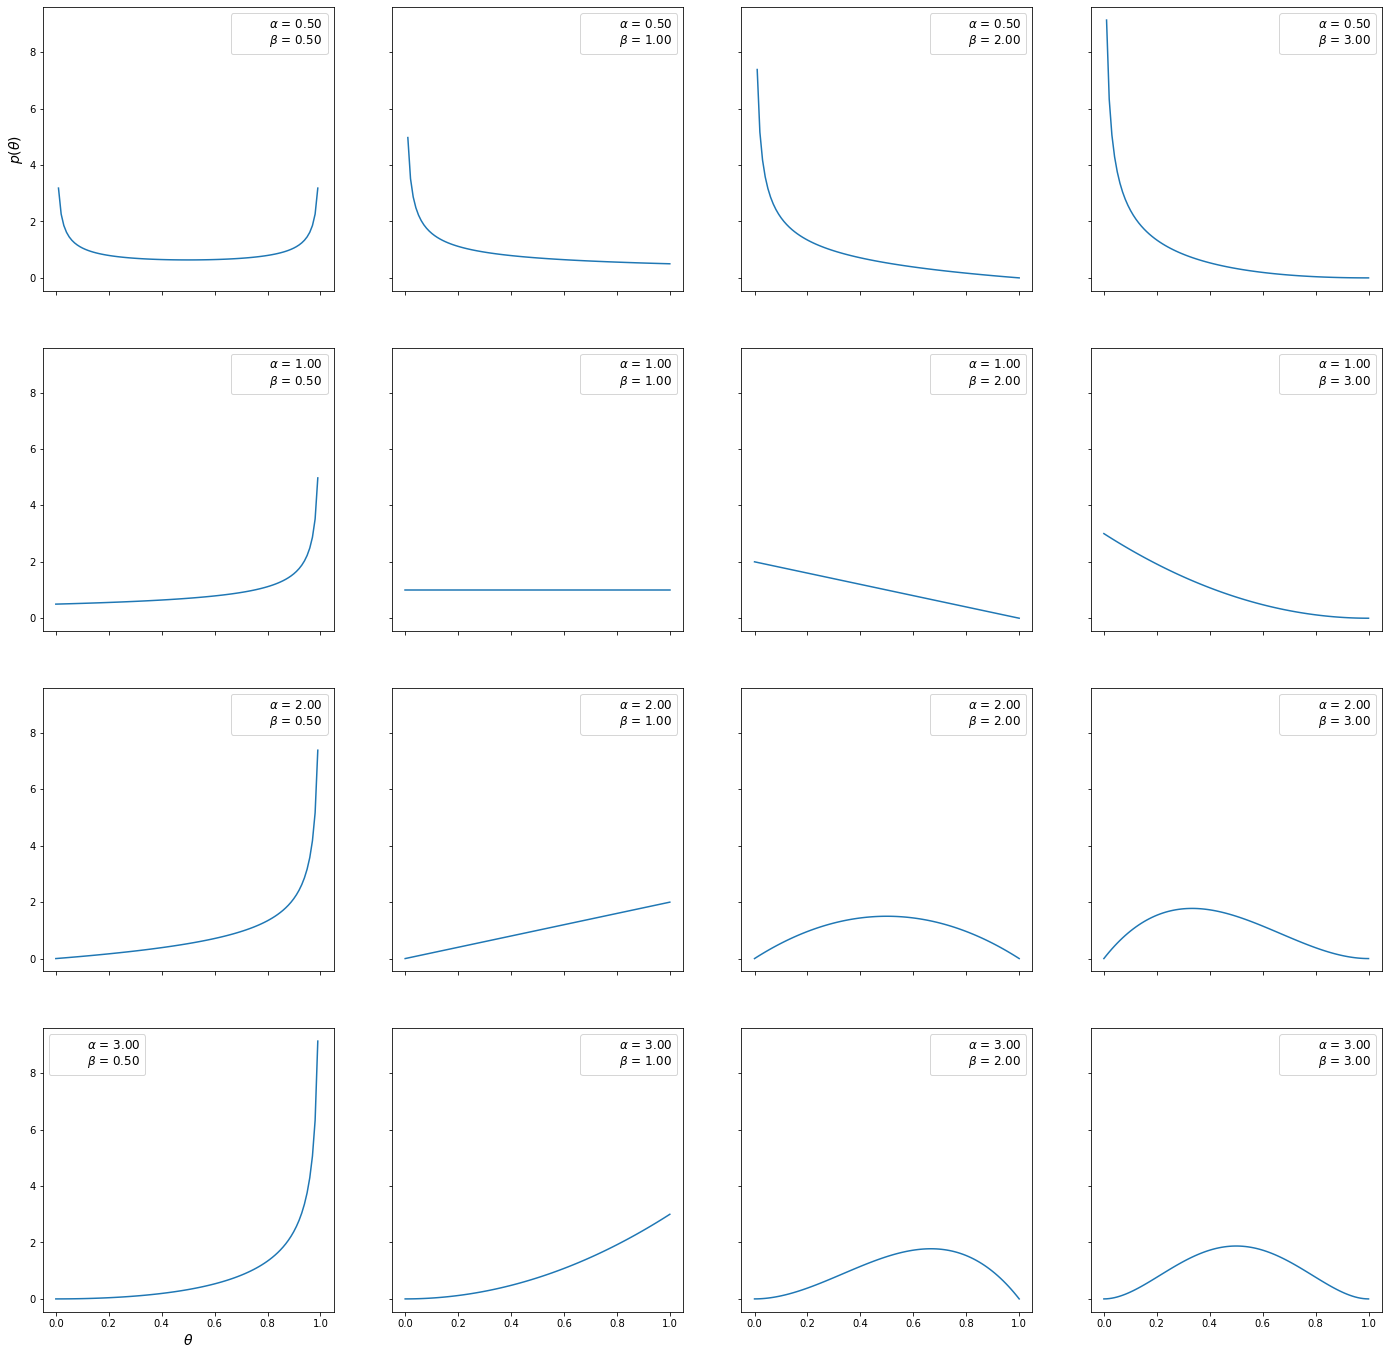

In [14]:
# beta distribution
params = [0.5, 1,2,3]
#p_params = [0.25, 0.5, 0.75]

x = np.linspace(0, 1, 100)

f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(24,24))

for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        
        y = stats.beta(a,b).pdf(x)
        #ax[i,j].vlines(x, 0, y, colors='b', lw=5)
        ax[i,j].plot(x,y)
        #ax[i,j].set_ylim(0,1)
        ax[i,j].plot(0,0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a,b), alpha=0)
        ax[i,j].legend(fontsize=12)
    
    ax[3,0].set_xlabel('$\\theta$', fontsize=14)
    ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14)
    #ax[0,0].set_xticks(x)

### Getting the posterior 
$$ p(\theta|y) \propto p(y|\theta)p(\theta) $$

In our case , we have to multiply the binomial and beta distributions

$$ p(\theta | y) \propto \frac{N!}{N!(N-y)!} \theta^y (1-\theta)^{N-y} \frac{\Gamma(\alpha + \beta)} {\Gamma(\alpha)\Gamma(\beta)} \theta^{\alpha-1}\theta^{\beta-1} $$

Equivalently we can write, by dropping everything but $\theta$
$$ p(\theta|y) \propto \theta^y(1-\theta)^{N-y} \theta^{\alpha-1} \theta^{\beta-1} $$
or, 
$$p(\theta|y) \propto \theta^{\alpha -1 + y} (1-\theta)^{\beta -1 + N - y} $$

If we look carefully, we can see that this has same form of a beta distribution with modified parameters, which is

$$ p(\theta | y) = Beta(\alpha_{prior}+y, \beta_{prior} + N -y ) $$

### Lets compute and plot the posterior

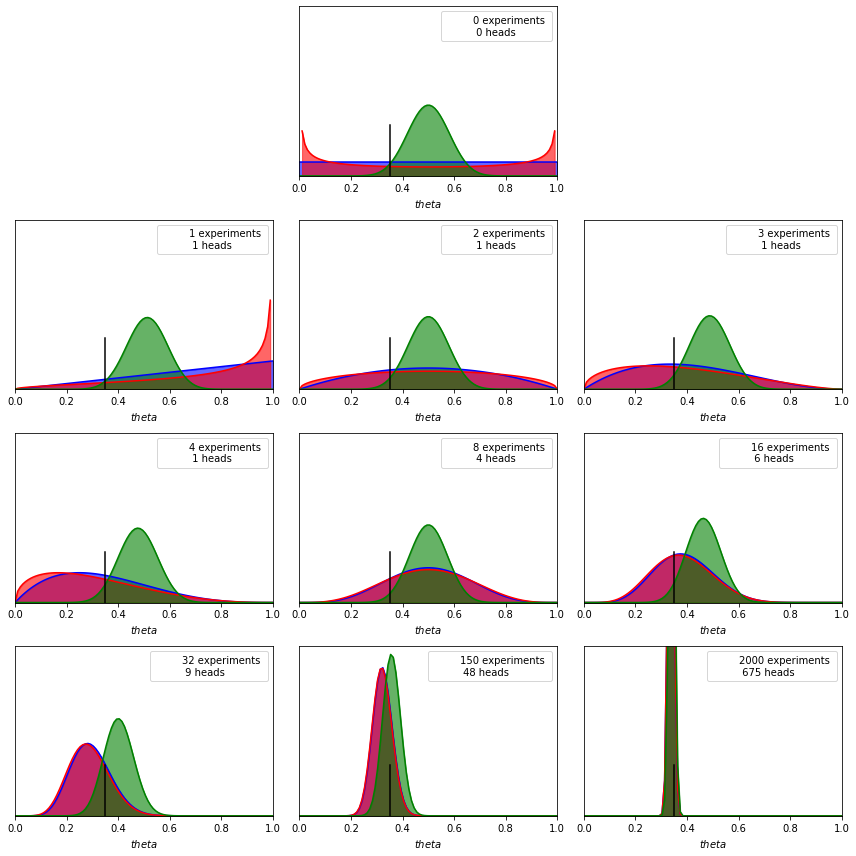

In [21]:
theta_real = 0.35
trails = [0,1,2,3,4,8,16,32,150, 2000]
data = [0,1,1,1,1,4,6,9,48,675]

beta_params = [(1,1), (0.5,0.5), (20,20)]
dist = stats.beta
x = np.linspace(0,1,100)

plt.figure(figsize=(12,12))

for idx, N in enumerate(trails):
    if idx == 0:
        plt.subplot(4,3,2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha = 0.6)
        
    #plt.figure(figsize=(6,6))
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0,0, label="{:d} experiments \n {:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$theta$')
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()